<a href="https://colab.research.google.com/github/owaisahmad315/pandas/blob/main/DataFrames.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
"""
Below is a simple attempt to create a tabular Python data structure that
is column oriented. It has an 0-based integer index, but that is not required,
the index could be string based. Each column is similar to the Series-like
structure developed previously:
"""

df = {
    'index': [0,1,2],
    'cols' : [
        {
            'name' : 'growth',
            'data' : [.5, .7, 1.2]
        },
        {
            'name': 'Name',
            'data' : ['Paul', 'George', 'Ringo']
        }
    ]
}

In [2]:
"""
Rows are accessed via the index, and columns are accessible from the
column name. Below are simple functions for accessing rows and
columns:

"""
def get_row(df, idx):
  results = []
  value_idx = df['index'].index(idx)
  for col in df['cols']:
    results.append(col['data'][value_idx])
  return results
get_row(df, 1)

[0.7, 'George']

In [3]:
def get_col(df, name):
  for col in df['cols']:
    if col['name'] == name:
      return col['data']
get_col(df, 'Name')


['Paul', 'George', 'Ringo']

In [4]:
"""
Using the pandas DataFrame object, the previous data structure could be
created like this:

"""

import pandas as pd

df = pd.DataFrame({
    'growth': [.5, .7, 1.2],
    'Name' : ['Paul', 'George', 'Ringo']
})
df

,growth,Name
0,0.5,Paul
1,0.7,George
2,1.2,Ringo


In [5]:
# To access a row by location, index off of the .iloc attribute:
df.iloc[2]

growth      1.2
Name      Ringo
Name: 2, dtype: object

In [6]:
# Columns are accessible via indexing the column name off of the object:
df['Name']

0      Paul
1    George
2     Ringo
Name: Name, dtype: object

In [7]:
# Note the type of column is a pandas Series instance. Any operation that can be done to a series can be applied to a column:
type(df['Name'])

pandas.core.series.Series

##Construction
Data frames can be created from many types of input:

columns (dicts of lists)

rows (list of dicts)

CSV file (pd.read_csv)

from NumPy ndarray

And more, SQL, HDF5, etc



In [8]:
# Below is an example of creating a data frame from rows:
pd.DataFrame([
    {'growth': .5, 'Name': 'Paul'},
    {'growth': .7, 'Name': 'George'},
    {'growth': 1.2, 'Name' : 'Ringo'},
])

,growth,Name
0,0.5,Paul
1,0.7,George
2,1.2,Ringo


In [9]:
"""
A data frame can be instantiated from a NumPy array as well. The
column names will need to be specified:
"""
import numpy as np

pd.DataFrame(np.random.randn(10,3), columns=['a', 'b', 'c'])

,a,b,c
0,-0.557932,1.736630,0.467979
1,-1.799674,0.640014,0.422526
2,-0.080957,2.239667,-0.104957
3,-0.181147,0.630291,0.075605
4,0.361458,1.062311,1.146074
5,-0.679484,0.516850,-0.346447
6,0.621218,0.690222,0.784832
7,-0.817937,0.016492,0.108807
8,0.026054,1.304502,-0.471304
9,-0.811973,-0.900733,-1.746324


In [10]:
# Data Frame Axis
"""
Unlike a series, which has one axis, there are two axes for a data frame.
They are commonly referred to as axis 0 and 1, or the row/index axis and
the columns axis respectively:
"""
df.axes

[RangeIndex(start=0, stop=3, step=1),
 Index(['growth', 'Name'], dtype='object')]

In [11]:
"""
As many operations take an axis parameter, it is important to remember
that 0 is the index and 1 is the columns:
"""
df.axes[0]

RangeIndex(start=0, stop=3, step=1)

In [12]:
df.axes[1]

Index(['growth', 'Name'], dtype='object')

In [13]:
from io import StringIO

data = StringIO('''LOCATION,MILES,ELEVATION,CUMUL,% CUMUL GAIN
  Big Mountain Pass Aid Station,39.07,7432,11579,43.8%
  Mules Ear Meadow,40.75,7478,12008,45.4%
  Bald Mountain,42.46,7869,12593,47.6%
  Pence Point,43.99,7521,12813,48.4%
  Alexander Ridge Aid Station,46.9,6160,13169,49.8%
  Alexander Springs,47.97,5956,13319,50.3%
  Rogers Trail junction,49.52,6698,13967,52.8%
  Rogers Saddle,49.77,6790,14073,53.2%
  Railroad Bed,50.15,6520,,
  Lambs Canyon Underpass Aid Station,52.48,6111,14329,54.2%''')

In [14]:
df = pd.read_csv(data)

In [15]:
df

,LOCATION,MILES,ELEVATION,CUMUL,% CUMUL GAIN
0,Big Mountain Pass Aid Station,39.07,7432,11579.0,43.8%
1,Mules Ear Meadow,40.75,7478,12008.0,45.4%
2,Bald Mountain,42.46,7869,12593.0,47.6%
3,Pence Point,43.99,7521,12813.0,48.4%
4,Alexander Ridge Aid Station,46.90,6160,13169.0,49.8%
5,Alexander Springs,47.97,5956,13319.0,50.3%
6,Rogers Trail junction,49.52,6698,13967.0,52.8%
7,Rogers Saddle,49.77,6790,14073.0,53.2%
8,Railroad Bed,50.15,6520,NaN,NaN
9,Lambs Canyon Underpass Aid Station,52.48,6111,14329.0,54.2%


In [16]:
# Looking at the data
df.describe()

,MILES,ELEVATION,CUMUL
count,10.000000,10.000000,9.000000
mean,46.306000,6853.500000,13094.444444
std,4.493574,681.391428,942.511686
min,39.070000,5956.000000,11579.000000
25%,42.842500,6250.000000,12593.000000
50%,47.435000,6744.000000,13169.000000
75%,49.707500,7466.500000,13967.000000
max,52.480000,7869.000000,14329.000000


In [18]:
df['LOCATION'].value_counts()

  Big Mountain Pass Aid Station         1
  Mules Ear Meadow                      1
  Bald Mountain                         1
  Pence Point                           1
  Alexander Ridge Aid Station           1
  Alexander Springs                     1
  Rogers Trail junction                 1
  Rogers Saddle                         1
  Railroad Bed                          1
  Lambs Canyon Underpass Aid Station    1
Name: LOCATION, dtype: int64

In [19]:
df.corr()


<ipython-input-19-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,MILES,ELEVATION,CUMUL
MILES,1.000000,-0.783780,0.986613
ELEVATION,-0.783780,1.000000,-0.674333
CUMUL,0.986613,-0.674333,1.000000


##Plotting With Data Frames

Data frames also have built-in plotting ability. The default behavior is to
use the index as the x values, and plot every numerical column (any string
column is ignored):

<Figure size 640x480 with 0 Axes>

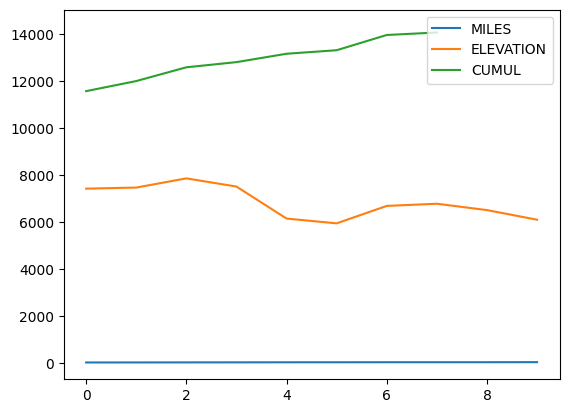

In [23]:
import matplotlib.pyplot as plt

fig = plt.figure()
df.plot()
fig.savefig('/tmp/df-ex1.png')


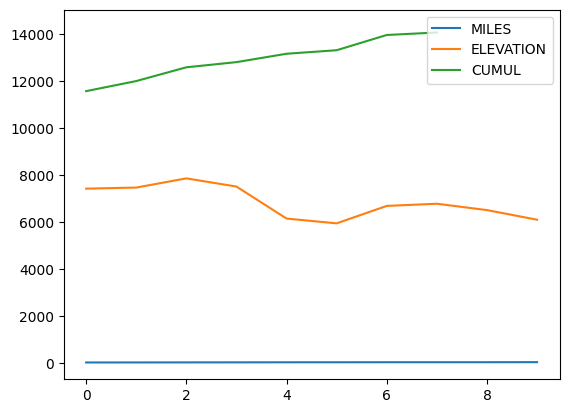

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111)
df.plot(ax = ax)
fig.savefig('/tmp/df-ex2.png')

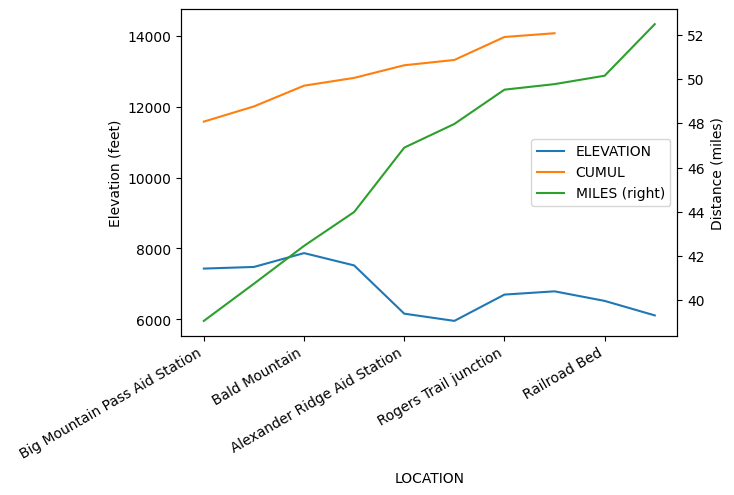

In [31]:
fig = plt.figure()
ax = fig.add_subplot(111)
df.plot(x = 'LOCATION', y=['ELEVATION', 'CUMUL'], ax = ax)
df.plot(x = 'LOCATION', y='MILES', secondary_y=True, ax=ax)
ax.set_ylabel('Elevation (feet)')
ax.right_ax.set_ylabel('Distance (miles)')
fig.autofmt_xdate()
fig.savefig('/tmp/df-ex4.png', bbox_inches='tight')
